In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

col_names = pd.read_csv('../data/dataset.csv', nrows=0).columns
dtype_map = {'class' : np.int16, 'bankruptcy_after_years' : np.int16, 'year' : np.int16}
dtype_map.update({col: np.float64 for col in col_names if col not in dtype_map})

df = pd.read_csv('../data/dataset.csv', dtype=dtype_map)
df = df.drop([df.columns[0], df.columns[1], df.columns[2]], axis=1)
df.drop_duplicates(keep=False, inplace=True)
df.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,0,1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,0,1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,0,1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,0,1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,0,1


The following variables are mapped to **int16** data type:
- a) **class** - binary output variable that is suitable for 2-class classification;
- b) **bankruptcy_after_years** - discrete output variable with 5 possible values that is suitable for multiclass classification, range [0, 5], where 0 indicates firm was ot bakrupted, 1..5 - firm bakrupted after 1..5 years;
- c) **year** - engineered discrete input variable that indicates the year when the observation was made, range [1, 5].

In [2]:
df['class'].value_counts()

0    40534
1     2075
Name: class, dtype: int64

In [3]:
df['bankruptcy_after_years'].value_counts()

0    40534
2      511
3      491
1      406
4      396
5      271
Name: bankruptcy_after_years, dtype: int64

In [4]:
df['year'].value_counts()

3    10329
2     9999
4     9628
1     6863
5     5790
Name: year, dtype: int64

In [5]:
df.shape

(42609, 67)

In [6]:
percent_missing = df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Attr37,Attr37,43.868666
Attr21,Attr21,13.654392
Attr27,Attr27,6.421179
Attr60,Attr60,4.984862
Attr45,Attr45,4.973128
Attr24,Attr24,2.163862
Attr64,Attr64,1.868150
Attr53,Attr53,1.868150
Attr28,Attr28,1.868150
Attr54,Attr54,1.868150


Attributes with missing values fraction > 10%:
- X37 (current assets - inventories) / long-term liabilities ~ 44%
- X21 sales (n) / sales (n-1) ~ 14%

In [7]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years,year
count,42601.000000,42601.000000,42601.000000,42477.000000,4.252000e+04,42601.000000,42601.000000,42517.000000,42600.000000,42601.000000,...,4.252900e+04,42602.000000,4.048500e+04,42509.000000,4.248600e+04,42477.000000,41813.000000,42609.000000,42609.000000,42609.000000
mean,0.046504,0.593533,0.112906,6.373712,-3.870064e+02,-0.059096,0.102496,11.406720,2.495925,0.582465,...,3.056830e+01,1.342620,4.562674e+02,17.195150,1.516469e+03,9.393010,72.504672,0.048699,0.137060,2.940928
std,2.456032,5.896904,5.489866,298.181600,6.180798e+04,7.268185,5.617762,468.427189,57.706526,13.221351,...,5.383895e+03,123.236523,3.265091e+04,558.182979,1.405514e+05,125.325358,2386.499058,0.215240,0.670925,1.282577
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,0.000000,1.000000
25%,0.003347,0.270980,0.021584,1.049400,-4.915000e+01,0.000000,0.005704,0.426940,1.019200,0.293790,...,8.759300e-01,0.000000,5.550300e+00,4.522900,4.201025e+01,3.101600,2.192700,0.000000,0.000000,2.000000
50%,0.049660,0.473050,0.197180,1.569600,-8.087900e-01,0.000000,0.059570,1.064200,1.202150,0.504630,...,9.511900e-01,0.005979,9.808000e+00,6.657400,7.119650e+01,5.096000,4.328300,0.000000,0.000000,3.000000
75%,0.129870,0.690110,0.403960,2.783600,5.083125e+01,0.086128,0.151270,2.589200,2.077850,0.707240,...,9.927200e-01,0.236988,2.032500e+01,10.451000,1.169600e+02,8.622800,9.894800,0.000000,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000,5.000000


In [8]:
def draw_pie_chart(df, fre):
    labels = df[fre].astype('category').cat.categories.tolist()
    counts = df[fre].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

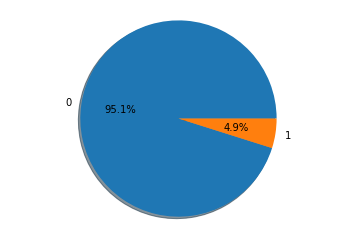

In [9]:
draw_pie_chart(df, 'class')

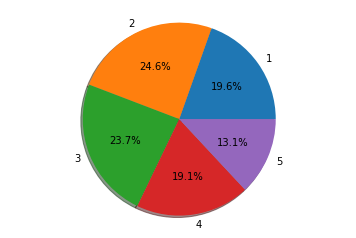

In [10]:
draw_pie_chart(df[df['bankruptcy_after_years'] > 0], 'bankruptcy_after_years')

4,9% of reports are bankrupted firms, where the majority of them were bankrupted after first 2 yeats, and the minority - after 5 years.

In [11]:
def plot_bankruptcy_classes_distribution():    
    plt.figure(figsize=(16, 8))
    
    temp = df[df['bankruptcy_after_years'] > 0]
    count = temp['bankruptcy_after_years'].value_counts()
    del temp
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=15)
    plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
    plt.show()

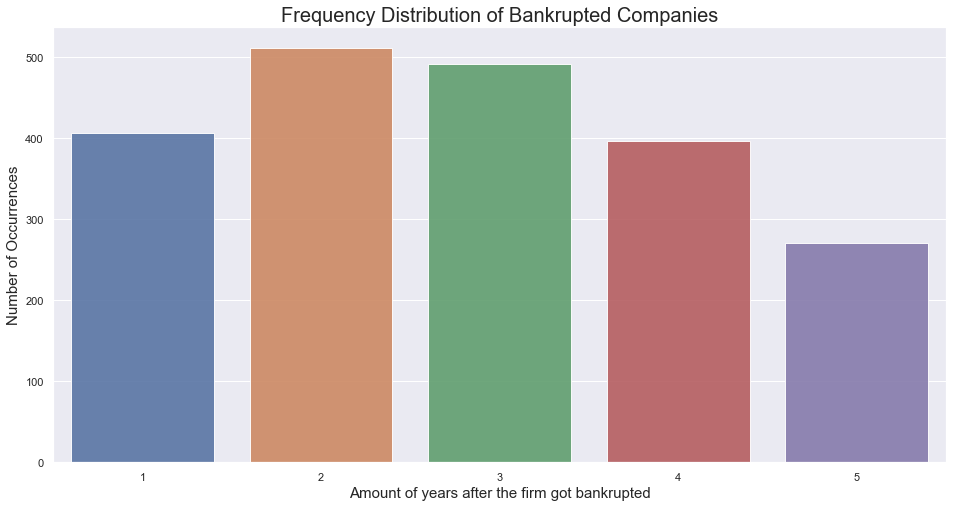

In [12]:
plot_bankruptcy_classes_distribution()

In [13]:
def plot_all_classes_distribution():    
    plt.figure(figsize=(16, 8))    
    count = df['bankruptcy_after_years'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=15)
    plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
    plt.show()

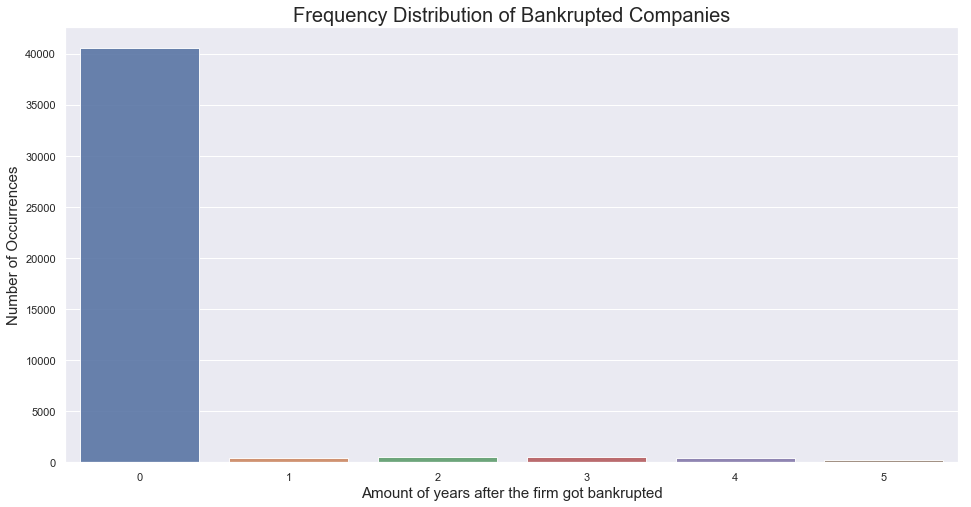

In [14]:
plot_all_classes_distribution()

The Anderson-Darling test evaluates whether the sample from the population follows a particular distribution. If the test statistic is higher than a critical value, the null hypothesis is rejected at the corresponding significance level (i.e there is evidence to suggest that the population doesn’t follow that particular distribution).

In [15]:
import scipy.stats

scipy.stats.anderson(df['class'], dist='norm')

AndersonResult(statistic=15423.279869728576, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [16]:
scipy.stats.anderson(df['bankruptcy_after_years'], dist='norm')

AndersonResult(statistic=14841.419699613223, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

According to the outputs of binary and 5-class output variable values arrays, the null hypothesis is rejected at all significance levels here as the test statistic is higher than all the critical values. Thus classes distribution doesn't follow normal distribution.

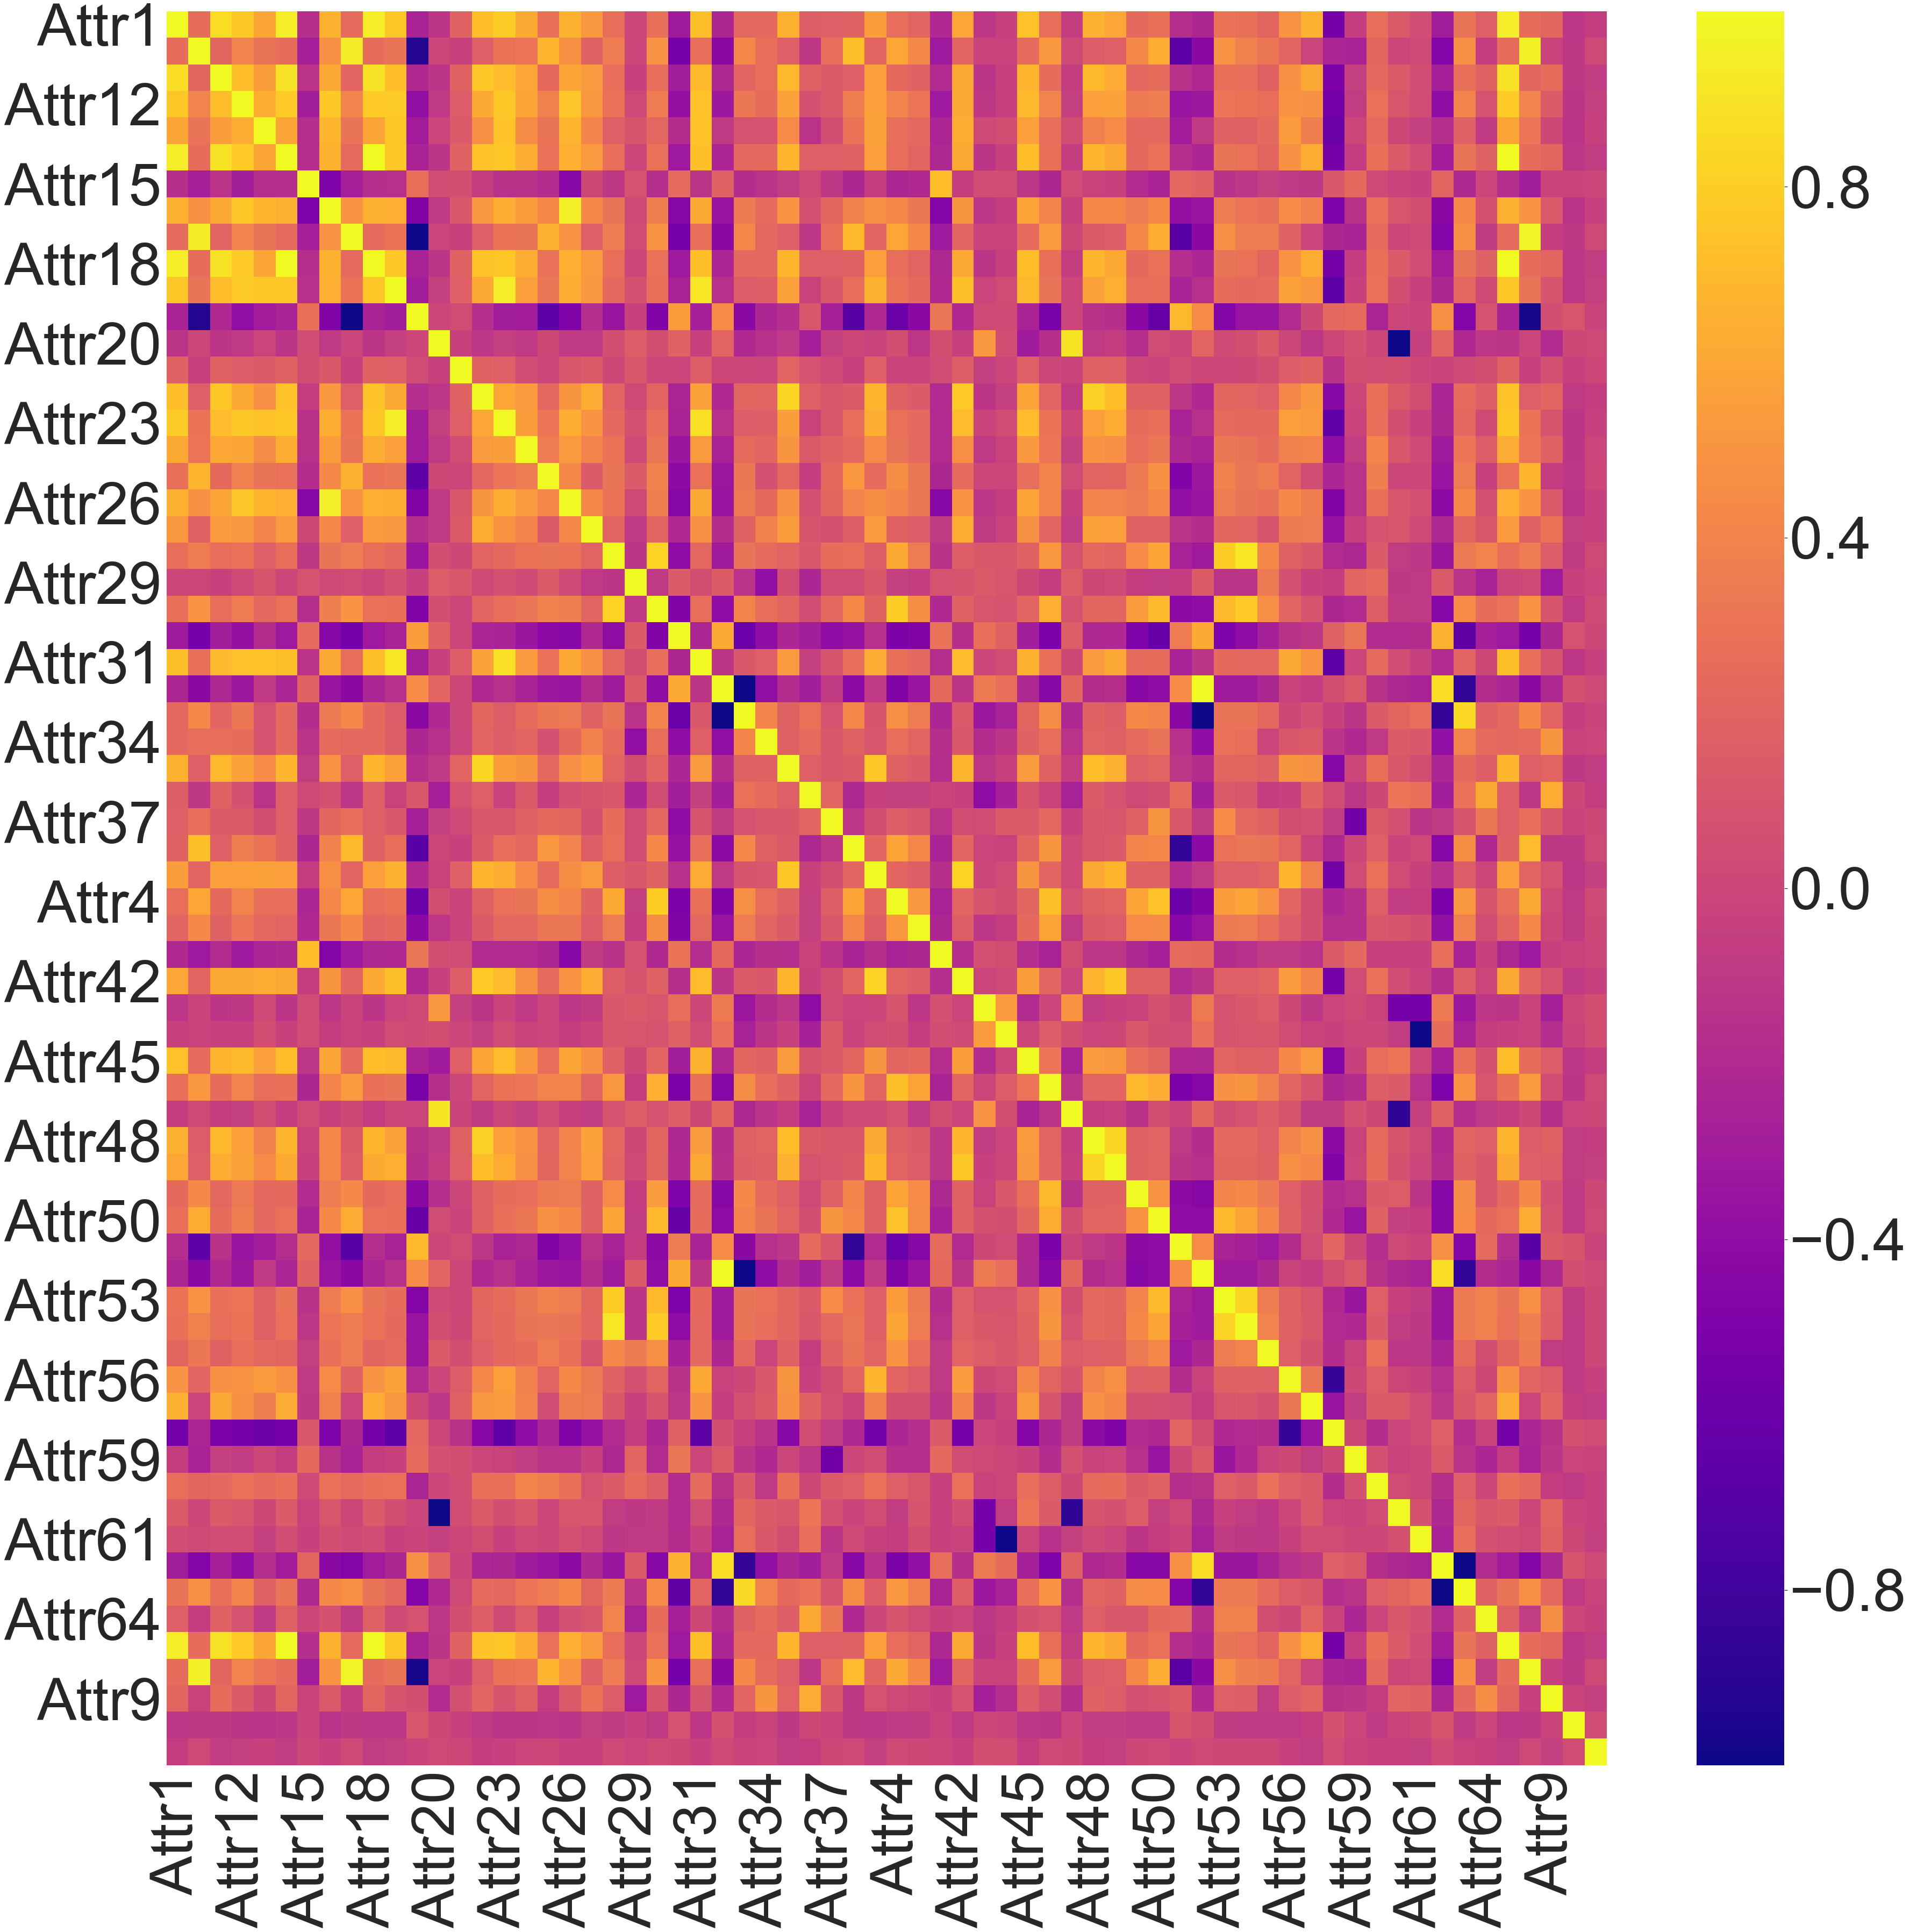

In [29]:
def plot_correlation(data, method):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.set(font_scale=10)
    correlation_matrix = data.corr(method=method, min_periods=1)
    sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.show()

plot_correlation(df[df.columns.difference(['bankruptcy_after_years'])], 'kendall')

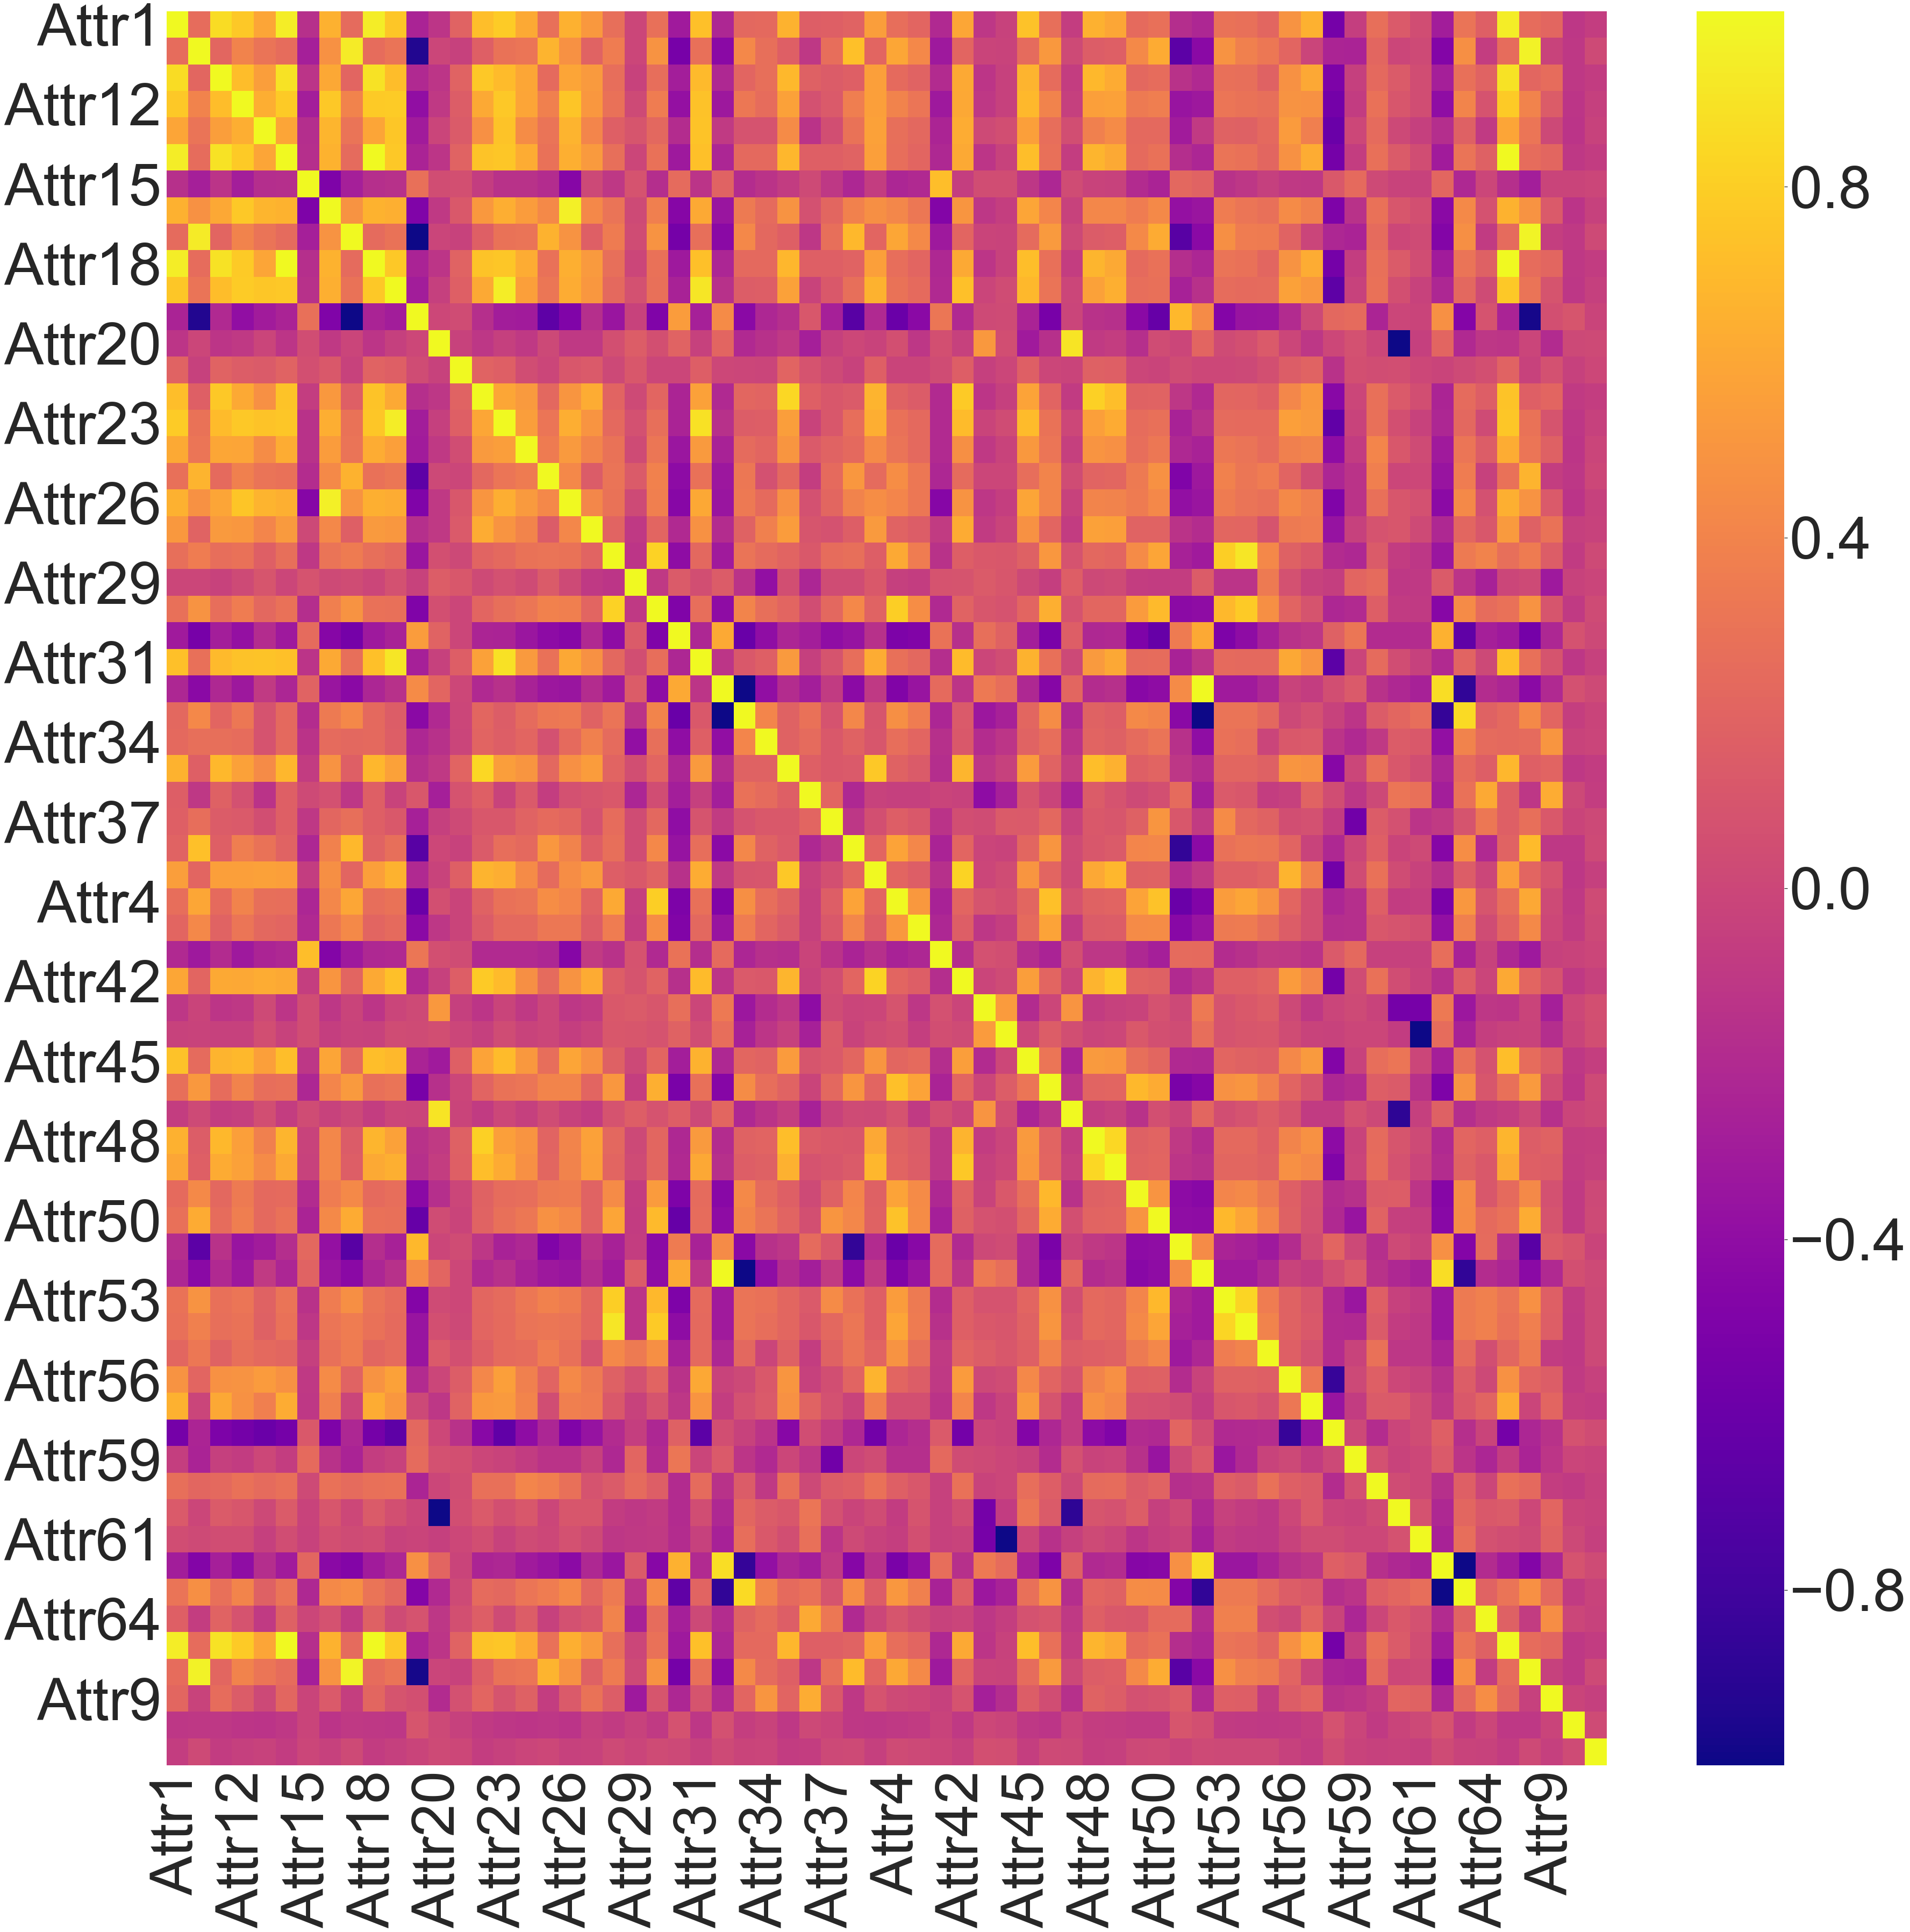

In [30]:
plot_correlation(df[df.columns.difference(['class'])], 'kendall')

According to correlation plots, in both cases there is a lot of features with too high correlation and some features with strongly negative correlation values.

In [18]:
import itertools

# Return dataframe with pairs of attriutes and corresponding Kendall's tau value
# excluding pairs of 2 same attributes:

def corrank(matrix):        
    return pd.DataFrame([[(i,j),matrix.loc[i,j]] for i,j in list(itertools.combinations(matrix, 2))], columns=['pairs','corr'])

Below is the sorted list of attributes pairs and their correlation based on Kendall's tau value.

In [19]:
corr_matrix = df.loc[:, df.columns !='class'].corr(method="kendall")
corr_matrix = corrank(corr_matrix)
print(corr_matrix.sort_values(by='corr',ascending=False))

                 pairs      corr
770   (Attr14, Attr18)  0.999873
381    (Attr7, Attr14)  0.999839
385    (Attr7, Attr18)  0.999712
1569  (Attr32, Attr52)  0.994654
442    (Attr8, Attr17)  0.970556
435    (Attr8, Attr10)  0.963546
879   (Attr16, Attr26)  0.957647
5       (Attr1, Attr7)  0.940603
12     (Attr1, Attr14)  0.940464
16     (Attr1, Attr18)  0.940338
1020  (Attr19, Attr23)  0.939503
555   (Attr10, Attr17)  0.934404
1429  (Attr28, Attr54)  0.913508
1028  (Attr19, Attr31)  0.911609
1090  (Attr20, Attr47)  0.901090
378    (Attr7, Attr11)  0.893573
607   (Attr11, Attr14)  0.893412
611   (Attr11, Attr18)  0.893284
1206  (Attr23, Attr31)  0.886480
1579  (Attr32, Attr62)  0.873643
2049  (Attr52, Attr62)  0.872050
9      (Attr1, Attr11)  0.860901
1613  (Attr33, Attr63)  0.856162
1974  (Attr48, Attr49)  0.838076
1167  (Attr22, Attr35)  0.837398
2054  (Attr53, Attr54)  0.835586
1769  (Attr39, Attr42)  0.827953
153    (Attr3, Attr28)  0.816374
1180  (Attr22, Attr48)  0.806375
1428  (Att

In [20]:
print(corr_matrix[corr_matrix['corr'].between(0.2, 0.8, inclusive=False)].sort_values(by='corr',ascending=False))

                 pairs      corr
129     (Attr3, Attr4)  0.796965
666   (Attr12, Attr19)  0.783022
21     (Attr1, Attr23)  0.781864
379    (Attr7, Attr12)  0.779925
661   (Attr12, Attr14)  0.779783
665   (Attr12, Attr18)  0.779656
1174  (Attr22, Attr42)  0.774085
179    (Attr3, Attr54)  0.773592
969   (Attr18, Attr19)  0.772720
771   (Attr14, Attr19)  0.772629
386    (Attr7, Attr19)  0.772499
615   (Attr11, Attr22)  0.772422
663   (Attr12, Attr16)  0.772318
1652  (Attr35, Attr39)  0.770617
670   (Attr12, Attr23)  0.769945
1851  (Attr42, Attr49)  0.767335
10     (Attr1, Attr12)  0.766968
17     (Attr1, Attr19)  0.761044
719   (Attr13, Attr19)  0.760968
973   (Attr18, Attr23)  0.760788
775   (Attr14, Attr23)  0.760669
390    (Attr7, Attr23)  0.760510
673   (Attr12, Attr26)  0.753835
731   (Attr13, Attr31)  0.749433
389    (Attr7, Attr22)  0.749367
774   (Attr14, Attr22)  0.749219
972   (Attr18, Attr22)  0.749098
723   (Attr13, Attr23)  0.744550
678   (Attr12, Attr31)  0.740924
237    (At

In [21]:
print(corr_matrix[corr_matrix['corr'].between(-0.8, 0, inclusive=False)].sort_values(by='corr',ascending=False))

                                 pairs      corr
122                    (Attr2, Attr60) -0.000230
1318                  (Attr25, Attr60) -0.000347
1099                  (Attr20, Attr56) -0.000369
598                   (Attr10, Attr60) -0.000421
1526                  (Attr31, Attr43) -0.000575
869                     (Attr15, year) -0.000849
1113                  (Attr21, Attr25) -0.001238
1121                  (Attr21, Attr33) -0.001243
567                   (Attr10, Attr29) -0.001300
1044                  (Attr19, Attr47) -0.001317
1302                  (Attr25, Attr44) -0.001365
27                     (Attr1, Attr29) -0.001502
1134                  (Attr21, Attr46) -0.002009
352                    (Attr6, Attr44) -0.002026
1844                    (Attr41, year) -0.002129
396                    (Attr7, Attr29) -0.002454
781                   (Attr14, Attr29) -0.002614
979                   (Attr18, Attr29) -0.002741
2142  (Attr64, bankruptcy_after_years) -0.002857
1906                

Pairs of features that have extremely high positive degree of association in range (0.8, 1):
- X14 & X18
- X7 & X14
- X7 & X18
- X32 & X52
- X8 & X17
- X8 & X10
- X16 & X26



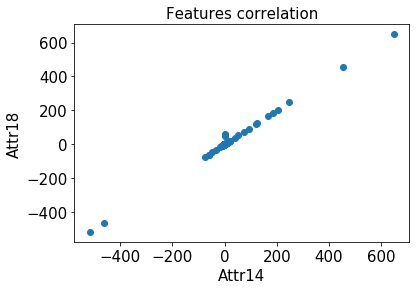

In [22]:
def plot_correlation(fre1, fre2):
    ax = plt.subplot(111, xlabel=fre1, ylabel=fre2, title='Features correlation')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                  ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.scatter(df[fre1], df[fre2])
    plt.show()

plot_correlation('Attr14', 'Attr18')

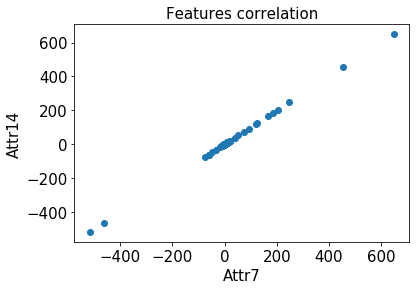

In [23]:
plot_correlation('Attr7', 'Attr14')

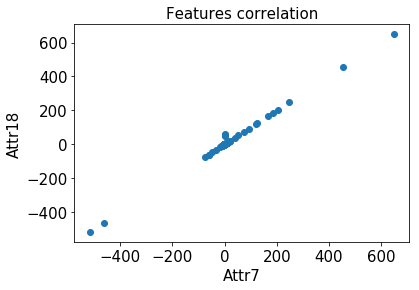

In [24]:
plot_correlation('Attr7', 'Attr18')

As it is seen from the features correlation plots above, the features with the lowest correlation values have strong negative non-linear relationship.

In [25]:
def plot_stacked_hist(x_var, groupby_var):
    df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [df[x_var].values.tolist() for i, df in df_agg]

    
    plt.figure(figsize=(16,9), dpi= 80)
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

    
    plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Stacked Histogram of ${x_var}$ colored by bankruptcy class", fontsize=22)
    plt.xlabel(x_var)
    plt.ylabel("Frequency")
    plt.ylim(0, 25)
    plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
    plt.show()

D:\Python\Python37\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Python\Python37\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


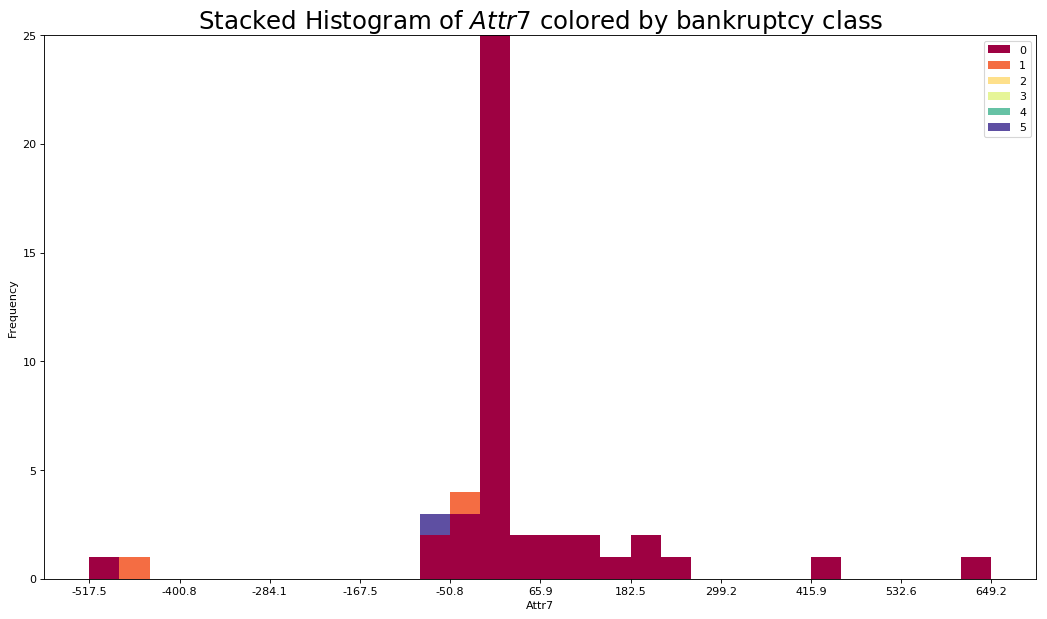

In [26]:
plot_stacked_hist('Attr7', 'bankruptcy_after_years')

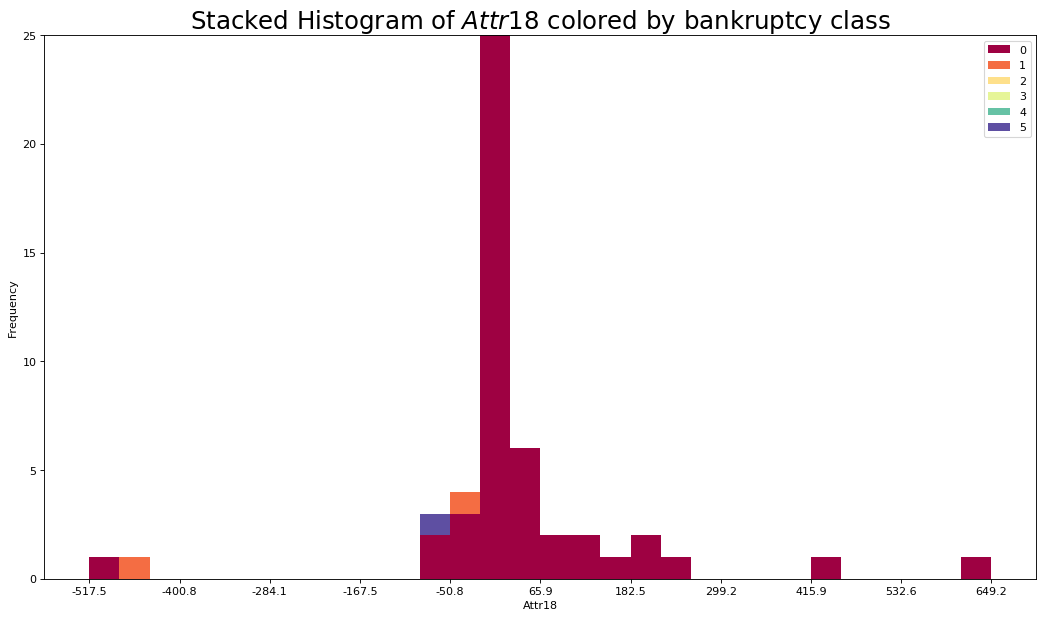

In [27]:
plot_stacked_hist('Attr18', 'bankruptcy_after_years')

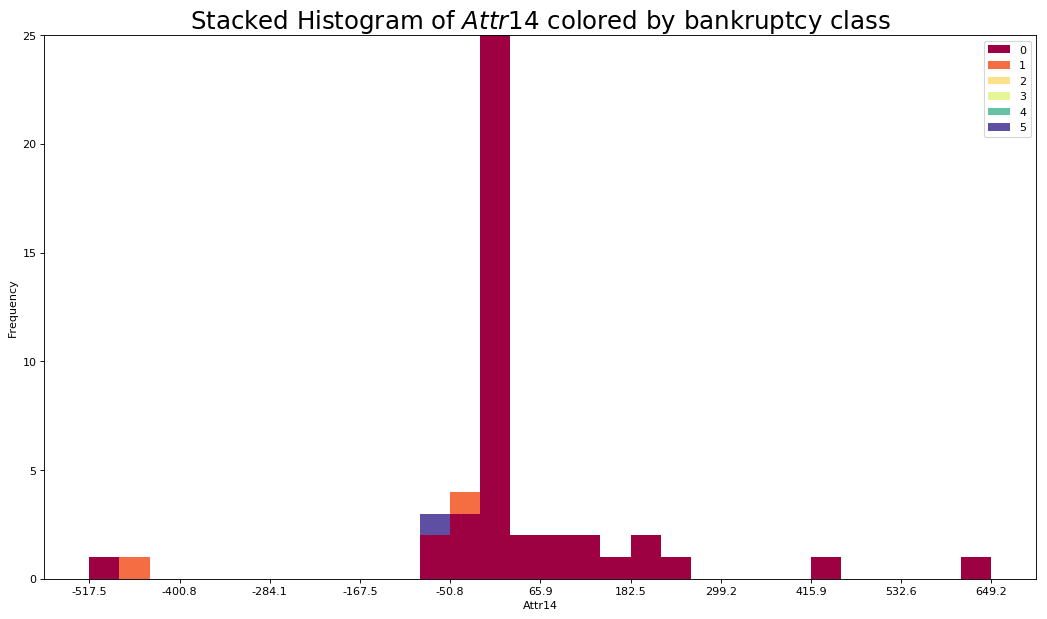

In [28]:
plot_stacked_hist('Attr14', 'bankruptcy_after_years')

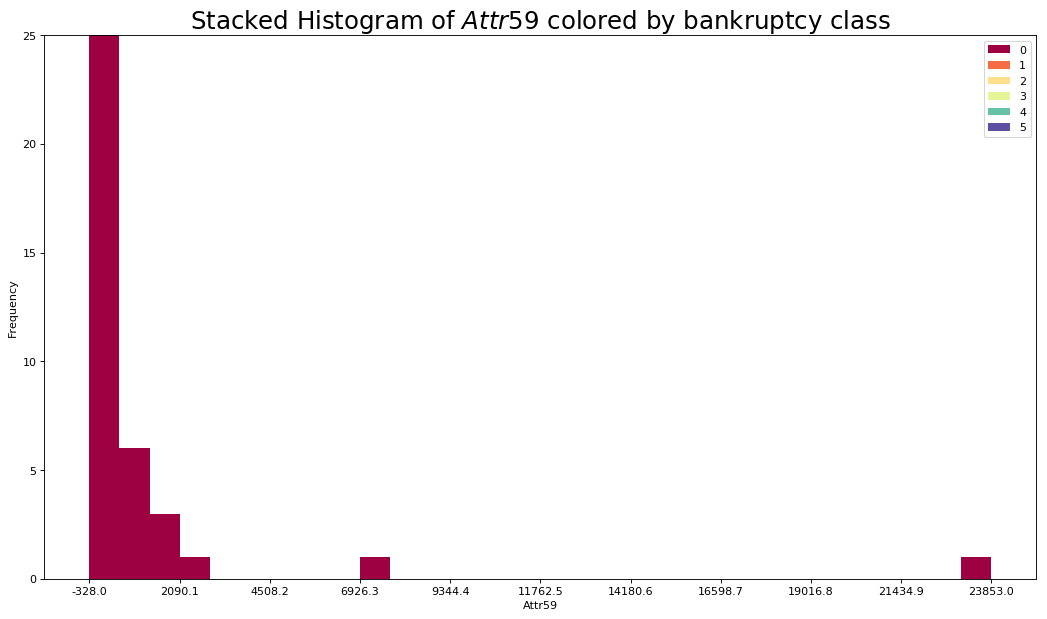

In [13]:
plot_stacked_hist('Attr59', 'bankruptcy_after_years')

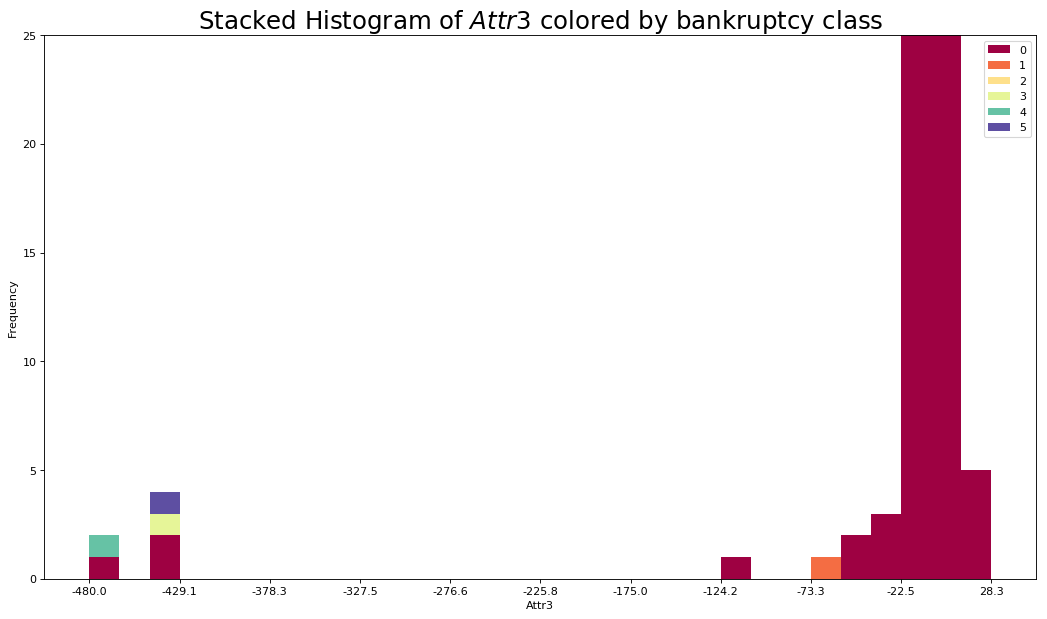

In [17]:
plot_stacked_hist('Attr3', 'bankruptcy_after_years')